In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

# Load MNIST dataset and split into training and testing sets
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data - normalize pixel values between 0 and 1
print("Preprocessing the data...")
x_train = x_train / 255.0
x_test = x_test / 255.0

# Adding a console to reflect runtime issues
print("Code execution reached this point.")

Loading MNIST dataset...
Preprocessing the data...
Code execution reached this point.


In [2]:
# Reshape images to match CNN input shape (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Data Augmentation
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)

# Adding a console to reflect successful execution
print("Code executed successfully.")

Code executed successfully.


In [3]:
# Define the CNN architecture with ReLU activation and L2 regularization
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10),
])

In [4]:
# Compile the model with appropriate optimizer and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
# Train the model on training set with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=5,
                    validation_data=(x_test, y_test))
# Adding a console to reflect successful execution
print("Code executed successfully.")

Epoch 1/5
938/938 [==============================] - 34s 35ms/step - loss: 0.5481 - accuracy: 0.9073 - val_loss: 0.2530 - val_accuracy: 0.9806
Epoch 2/5
938/938 [==============================] - 34s 36ms/step - loss: 0.2867 - accuracy: 0.9599 - val_loss: 0.1721 - val_accuracy: 0.9884
Epoch 3/5
938/938 [==============================] - 34s 36ms/step - loss: 0.2376 - accuracy: 0.9667 - val_loss: 0.1655 - val_accuracy: 0.9853
Epoch 4/5
938/938 [==============================] - 33s 35ms/step - loss: 0.2163 - accuracy: 0.9688 - val_loss: 0.1675 - val_accuracy: 0.9838
Epoch 5/5
938/938 [==============================] - 34s 36ms/step - loss: 0.2093 - accuracy: 0.9698 - val_loss: 0.1486 - val_accuracy: 0.9876
Code executed successfully.


In [6]:
# Function to recognize a handwritten digit from an image file
def recognize_digit(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    
    # Predict the digit using the trained model
    prediction = model.predict(img)
    digit = np.argmax(prediction)
    
    return digit

# Adding a console to reflect successful execution
print("Code executed successfully.")

Code executed successfully.


Enter 'q' to quit or press Enter to recognize a digit: 
1/1 [==============================] - 0s 142ms/step


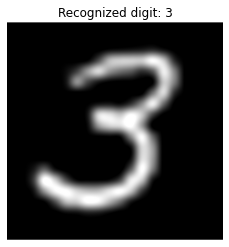

Enter 'q' to quit or press Enter to recognize a digit: q


In [7]:
# Path to the folder where user-placed images are stored
user_images_folder = "user_images/"

# Loop to continuously recognize digits from user images
while True:
    user_input = input("Enter 'q' to quit or press Enter to recognize a digit: ")
    
    if user_input.lower() == 'q':
        break
    
    # List image files in the user_images_folder
    image_files = [f for f in os.listdir(user_images_folder) if os.path.isfile(os.path.join(user_images_folder, f))]
    
    if not image_files:
        print("No images found in the folder. Please place an image in the user_images folder.")
        continue
    
    # Choose the first image for recognition (you can modify this part to choose specific files)
    image_to_recognize = image_files[0]
    image_path = os.path.join(user_images_folder, image_to_recognize)
    
    # Recognize the digit from the chosen image
    recognized_digit = recognize_digit(image_path)
    
    # Load and display the image
    img = Image.open(image_path)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Recognized digit: {recognized_digit}")
    plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

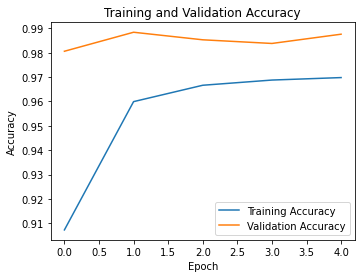

In [8]:
# Plot performance metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

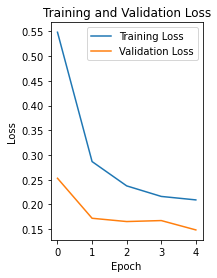

Application terminated.


In [9]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

print("Application terminated.")

In [10]:
# Evaluate the trained model on the entire test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 0.1486 - accuracy: 0.9876
Test Loss: 0.14858998358249664
Test Accuracy: 0.9876000285148621
